In [15]:
from modules.perlin import PerlinNoiseGenerator
from modules.tectonic import TectonicGenerator
import numpy as np

size = 2**9
seed = 32
g1 = TectonicGenerator(size=size, smoothing=size//6, plates_clusters=6, plates_iterations=1, seed=seed)
gen1 = g1.generate()
g2 = PerlinNoiseGenerator(size=size, scale=.004, octaves=4, seed=seed)
gen2 = g2.generate()

gen = gen1 * gen2
gen = (gen - np.min(gen)) / (np.max(gen) - np.min(gen))

[Tectonic] (512 size, 85 smoothing)
[Voronoi] (512 size, 6 clusters, 1 iterations
[PerlinNoise] (512 size, 0.004 scale, 4 octaves)


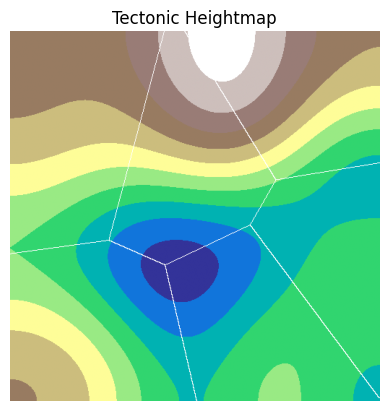

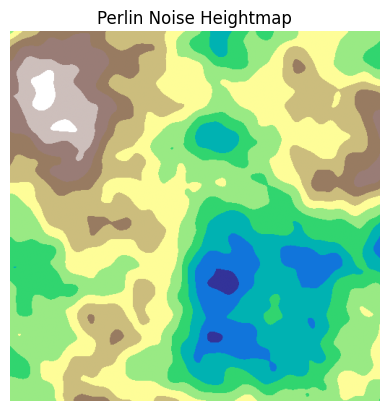

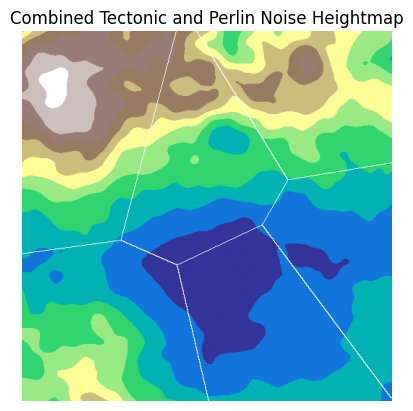

In [16]:
import numpy as np
from matplotlib import pyplot as plt

plate_overlay = g1.boundary_mask
gen1[plate_overlay] = 1
plt.imshow(np.round(gen1, 1), cmap='terrain')
plt.title('Tectonic Heightmap')
plt.axis('off')
plt.show()

plt.imshow(np.round(gen2, 1), cmap='terrain')
plt.title('Perlin Noise Heightmap')
plt.axis('off')
plt.show()

gen = np.round(gen, 1)
plate_overlay = g1.boundary_mask
gen[plate_overlay] = 1
plt.imshow(np.round(gen, 1), cmap='terrain')
plt.title('Combined Tectonic and Perlin Noise Heightmap')
plt.axis('off')
plt.show()